# Evaluation of Transport Network Criticality Results
Bramka Arga Jafino

Delft University of Technology

Faculty of Technology, Policy and Management

## An introduction note

This notebook presents follow-up evaluations of Bangladesh's multimodal freight transport network criticality results. There are five analysis in this notebook:
1. A01 Individual assessment of top 100 links for each metric
2. A02 Overlapping density between metrics
3. A03 Kolmogorov-Smirnov between metrics
4. A04 Spearman rank correlation coefficients between metrics
5. A05 Spearman rank correlation coefficients between final metrics set

## 0. Import all required modules and files

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import *
import matplotlib.colors as colors
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
from __future__ import division
from scipy.stats import gaussian_kde, skewnorm
from scipy import stats
import scipy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#Modules developed for this project
from transport_network_modeling import network_visualization as net_v

In [2]:
#import criticality results
crit_df_loc = r'./criticality_results/result_interdiction_1107noz2_v03.csv'
crit_df = pd.read_csv(crit_df_loc)

In [3]:
#remove one strange value in m2_02
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)

In [4]:
#record the metric names
metric_names = {'m1_01' : 'Change in unweighted daily accessibility', 
                'm1_02' : 'Change in number of nodes accessible within daily reach', 
                'm2_01': 'Change in unweighted total travel cost', 
                'm2_02' : 'Change in network average efficiency', 
                'm3_01' : 'Unweighted link betweenness centrality', 
                'm3_02': 'Change in region-based unweighted total travel cost', 
                'm4_01' : 'Minimum link cut centrality', 
                'm4_02' : 'OD k-connectivity', 
                'm5_01' : 'Nearby alternative links (simplified)', 
                'm6_01' : 'Change in weighted accessibility',
                'm7_01' : 'Change in weighted total travel cost', 
                'm7_02' : 'Change in expected user exposure', 
                'm7_03' : 'Change in worst-case user exposure', 
                'm8_01' : 'Traffic flow data', 
                'm8_02' : 'Weighted link betweenness centrality', 
                'm8_03' : 'Volume over capacity', 
                'm9_01' : 'Unsatisfied demand', 
                'm10' : 'Exposure to disaster'}

In [5]:
metric_names_df = pd.DataFrame()
metric_names_df['Code'] = metric_names.keys()
metric_names_df['Description'] = metric_names.values()
metric_names_df.sort_values(by='Code', inplace=True)
print('Metrics Code and Description')
metric_names_df

Metrics Code and Description


,Code,Description
9,m10,Exposure to disaster
1,m1_01,Change in unweighted daily accessibility
2,m1_02,Change in number of nodes accessible within da...
4,m2_01,Change in unweighted total travel cost
6,m2_02,Change in network average efficiency
17,m3_01,Unweighted link betweenness centrality
16,m3_02,Change in region-based unweighted total travel...
11,m4_01,Minimum link cut centrality
10,m4_02,OD k-connectivity
13,m5_01,Nearby alternative links (simplified)


## A01 Individual assessment of top 100 links for each metric
This section explores the distribution pattern of the criticality scores from the top 100 links in each criticality metric. 

In [6]:
crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]

crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

all_metric = ['m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

In [7]:
#alter the m5_01 criticality scores so that they are consistent to the formula  described in the report
crit_df2['m05_01'] = crit_df2.m05_01.apply(lambda x: 1/x if x > 0 else 2)

C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Individual metric scores' distribution


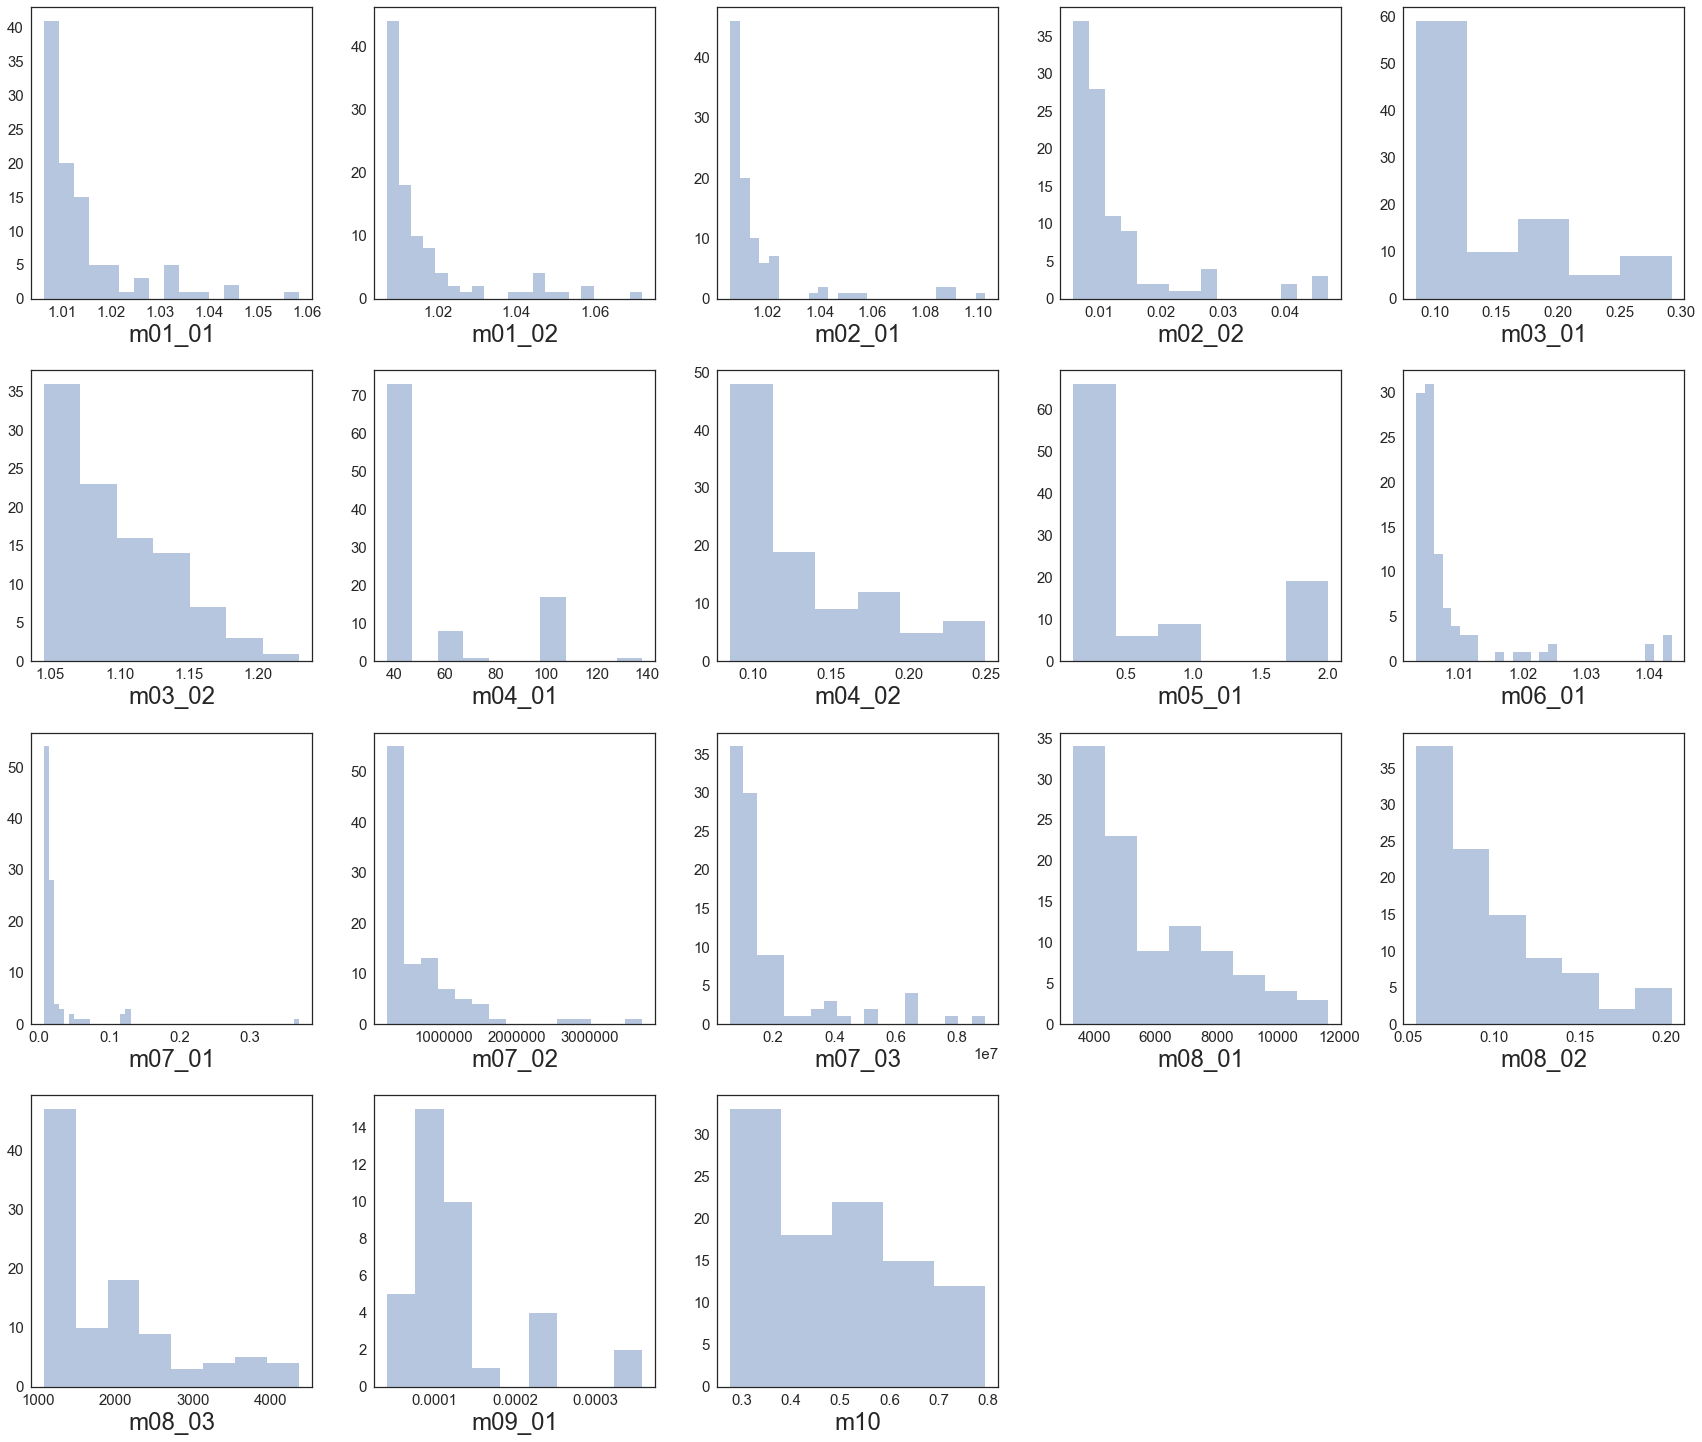

In [16]:
print("Individual metric scores' distribution")
fig1 = plt.figure(figsize=(24,60))
c=0
n=100
for num, metric in enumerate(all_metric):
    new_df = crit_df2[[metric, 'osmid']]
    new_df = new_df.loc[new_df[metric]!=0]
    topn_list = []
    try:
        topn_list.extend(list(new_df.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_df.sort_values(metric).osmid))
        
    new_df = new_df.loc[new_df['osmid'].isin(topn_list)]
    
    
    exec("ax{} = fig1.add_subplot(12, 5, c+1)".format(num))
    sns.set_style('white')
    exec("b = sns.distplot(new_df[metric], kde=False, rug=False, ax=ax{})".format(num))
    
    b.set_xlabel(metric, fontsize=24)
    c+=1
fig1.tight_layout()
plt.show()

## A02 Overlapping distribution between metrics
This section visualizes the comparisons of criticality scores distributions between all metrics.

First, create a DataFrame of union of top 100 critical links from all metrics

In [9]:
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))

data2 = crit_df2.ix[:, crit_df2.columns != 'osmid']

crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

Next, visualize the data

transport_network_modeling\network_visualization.py:674: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax1.set_axis_bgcolor('white')
transport_network_modeling\network_visualization.py:689: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax2.set_axis_bgcolor('white')


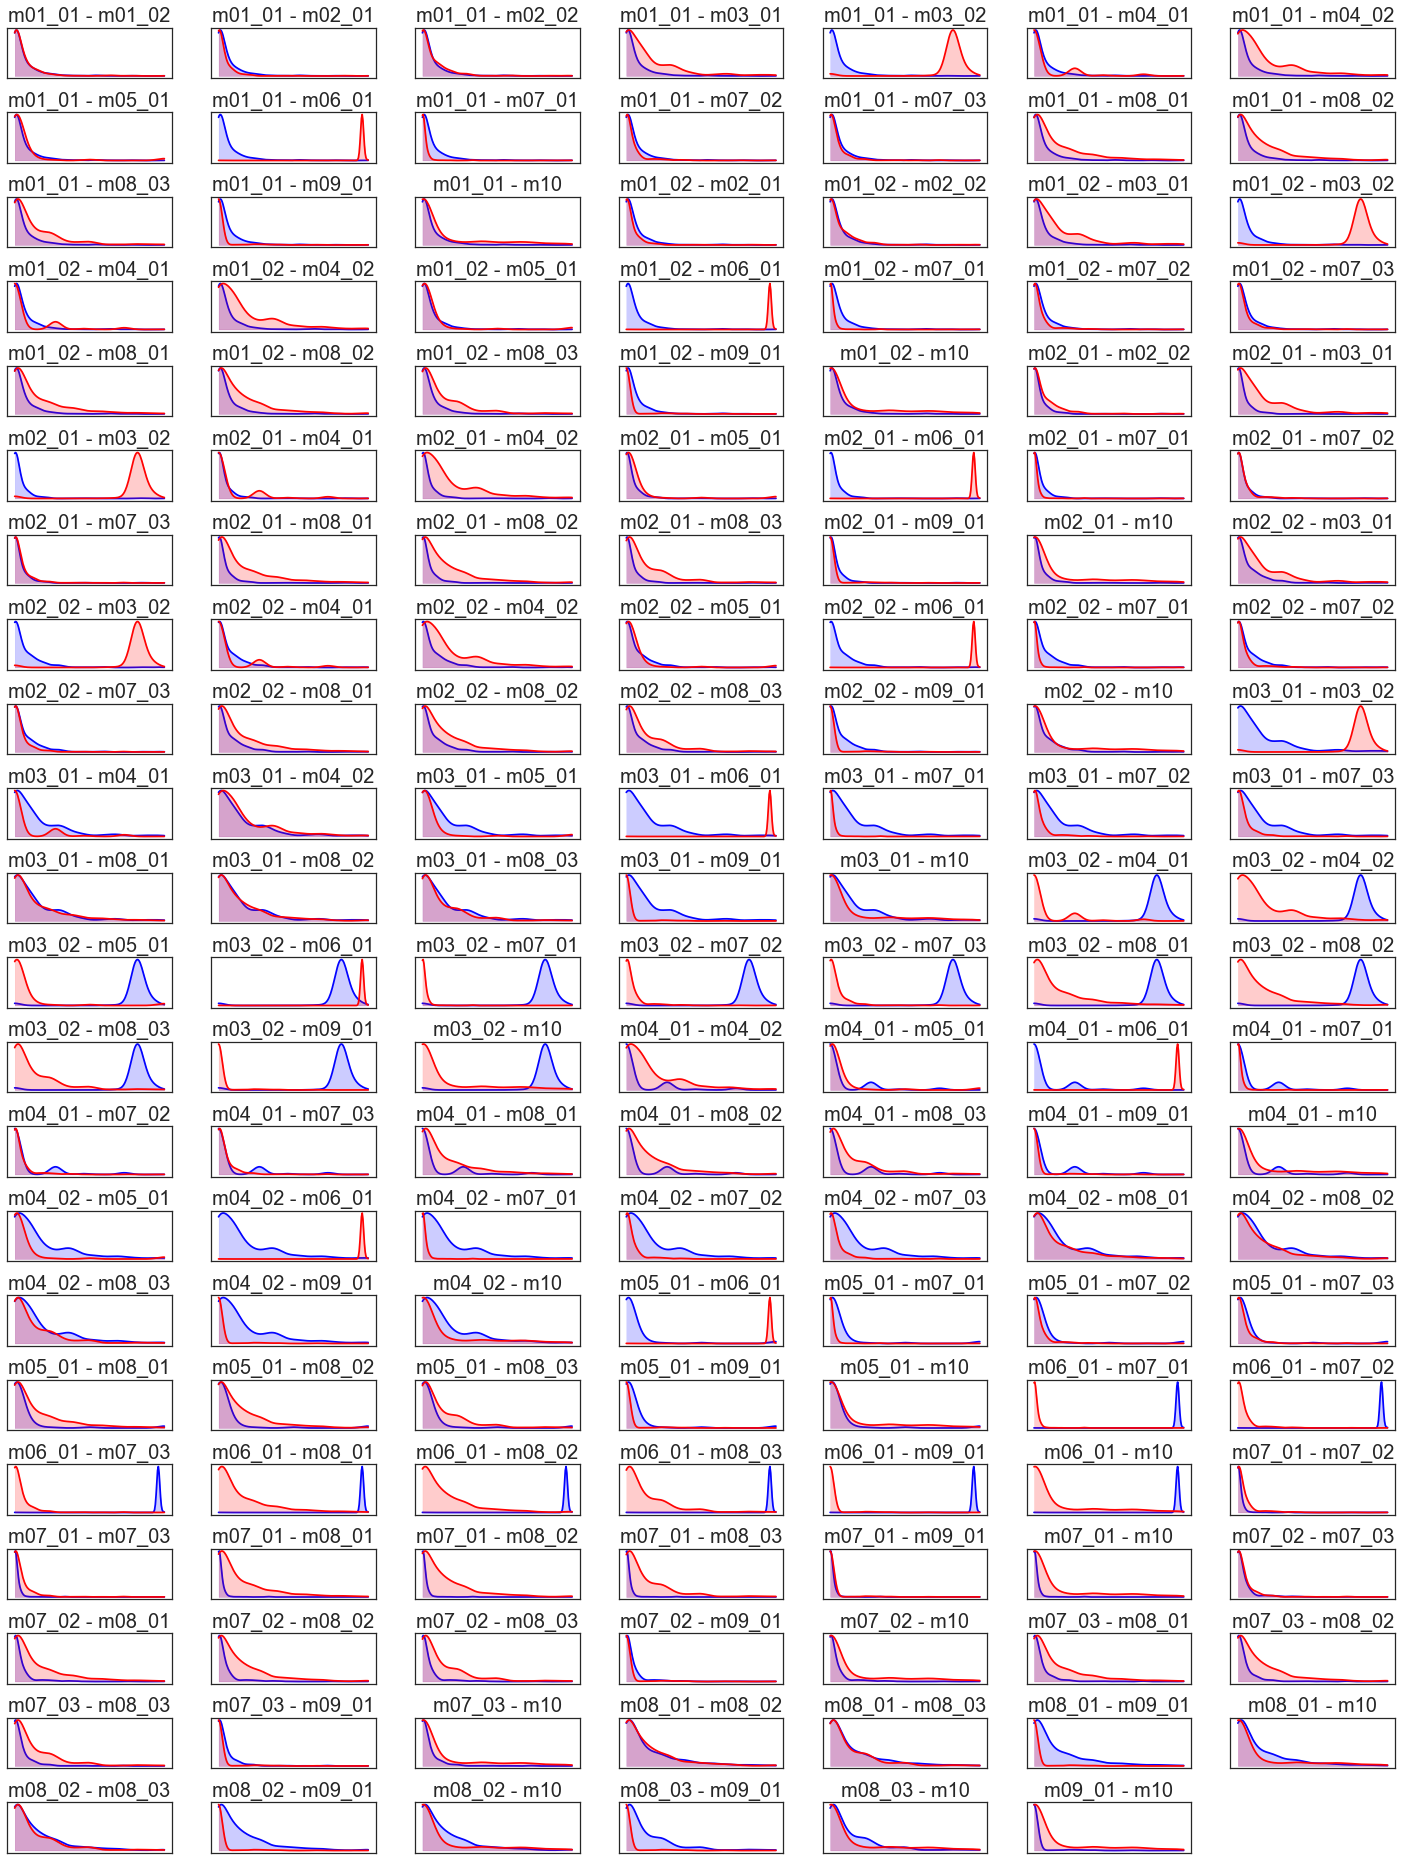

In [10]:
net_v.overlap_distribution(crit_df=crit_df2, all_metric=all_metric)

## A03 K-S Heatmap
While the visualization above already gives a general idea of the (dis)similarities between the metrics based on their criticality scores distribution, it is more convenient if the results are displayed in a single graph.
For this purpose, Kolmogorov-Smirnov (K-S) distance between the metrics are calculated.

In [13]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr, ks_2samp
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns

In [12]:
def correlate_metrics_pearson(df, m_a, m_b):
    df2 = df[df[m_a] + df[m_b] != 0]
    r, p = pearsonr(df2[m_a], df2[m_b])
    
    return r, p, len(df2)

def correlate_metrics_spearman(df, m_a, m_b):
    
    df2 = df[df[m_a] + df[m_b] != 0]
    df2 = df.copy()
    r, p = spearmanr(df2[m_a], df2[m_b])
    
    return r, p, len(df2)

def correlate_metrics_ks(df, m_a, m_b):
    
    df2 = df[df[m_a] + df[m_b] != 0]
    df2 = df.copy()
    D, p = ks_2samp(df2[m_a], df2[m_b])
    
    return D, p

First, create a DataFrame of union of top 100 critical links from all metrics

In [13]:
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))

data2 = crit_df2.ix[:, crit_df2.columns != 'osmid']

crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

Then calculate the K-S distance

In [14]:
#normalize between 0 and 1
#because the ks_2samp function assumes similar scale of values between the two datasets
for metric in all_metric:
    minval = crit_df2[metric].min()
    maxval = crit_df2[metric].max()
    rang = maxval - minval
    crit_df2[metric] = crit_df2[metric].apply(lambda val: (val-minval)/rang)

In [15]:
ks_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)
for index, rows1 in ks_df.iterrows():
    for value, rows2 in rows1.iteritems():
        D, p = correlate_metrics_ks(df=crit_df2, m_a=index, m_b=value)
        ks_df.set_value(index, value, D)

Finally, visualize it in a heatmap

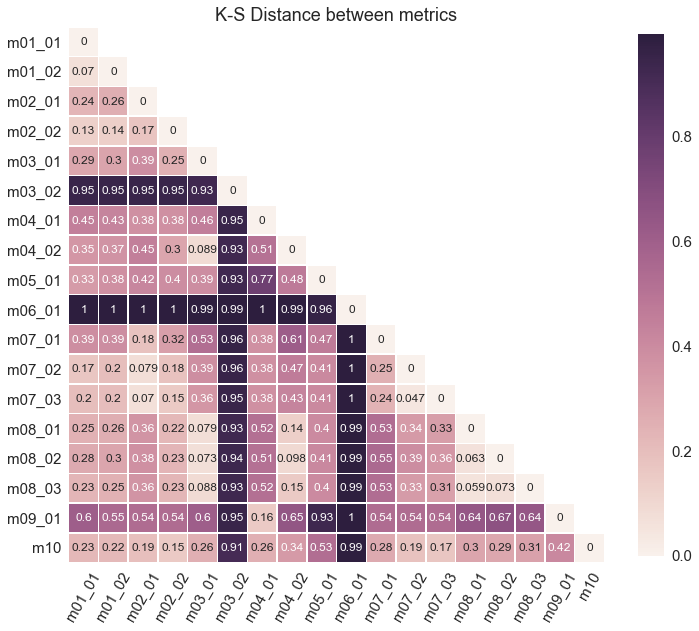

In [16]:
net_v.correlation_plot(ks_df, title='K-S Distance between metrics')

## A04 Spearman correlation
In order to observe the (dis)similarities between metrics, Spearman-rank correlation coefficients are used. If two metrics have high correlation coefficients, they can be considered as overlapping as they highlight the same transport segments as critical. Thus, one of them is subject to be eliminated.

First, create a DataFrame of union of top 100 critical links from all metrics

In [10]:
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))

data2 = crit_df2.ix[:, crit_df2.columns != 'osmid']

crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

Then calculate the Spearman rank correlation coefficients between all metrics

In [14]:
spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = correlate_metrics_spearman(df=crit_df2, m_a=index, m_b=value)
        spearmanr_df.set_value(index, value, r)

Lastly, visualize it in a heatmap

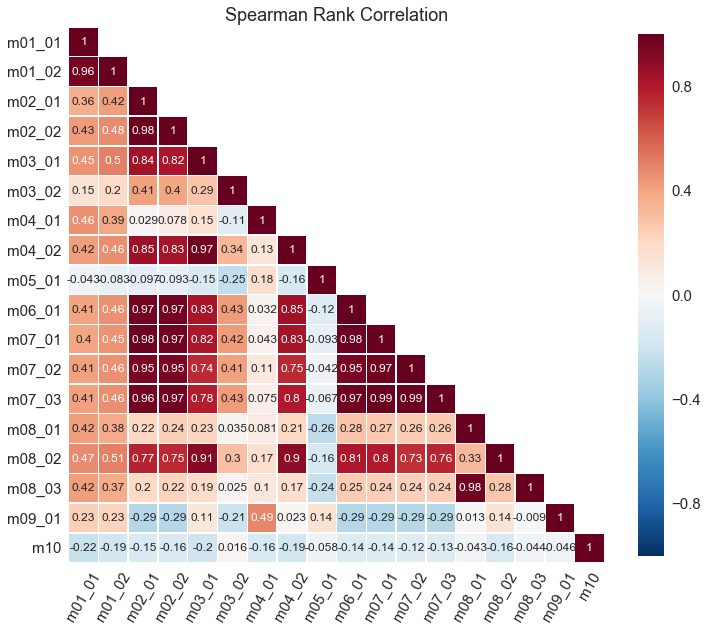

In [15]:
net_v.correlation_plot(spearmanr_df, title='Spearman Rank Correlation')

From the graph above we can observe the following metrics as having high correlation coefficients with the other metrics in general, as well as their corresponding counterpart:
    - m1_01 - m1_02
    - m1_02 - m1_01
    - m2_01 - m2_02
    - m2_02 - m2_01
    - m3_01 - m4_02
    - m4_02 - m3_01
    - m6_01 - m7_01
    - m7_01 - m6_01 and m2_01
    - m7_02 - m6_01 and m2_01
    - m7_03 - m6_01
    - m8_02 - m3_01

Therefore we reduce the highly correlated metrics set to only:
    - m1_01
    - m2_01
    - m4_02
    - m6_01
    - m8_02

Which means we leave out:
    - m1_02
    - m2_02
    - m3_01
    - m7_01
    - m7_02
    - m7_03

## A05 Reduced Spearman Correlation
In the final step, we revisualize the Spearman correlation heatmap only for the reduced metrics set to make sure that there is no more metric with high correlation coefficients in general

In [19]:
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))

data2 = crit_df2.ix[:, crit_df2.columns != 'osmid']

data2 = data2[['m01_01', 'm02_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
               'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']]

crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)
pearsonr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)


for index, rows1 in spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = correlate_metrics_spearman(df=crit_df2, m_a=index, m_b=value)
        spearmanr_df.set_value(index, value, r)
        
for index, rows1 in pearsonr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = correlate_metrics_pearson(df=crit_df2, m_a=index, m_b=value)
        pearsonr_df.set_value(index, value, r)

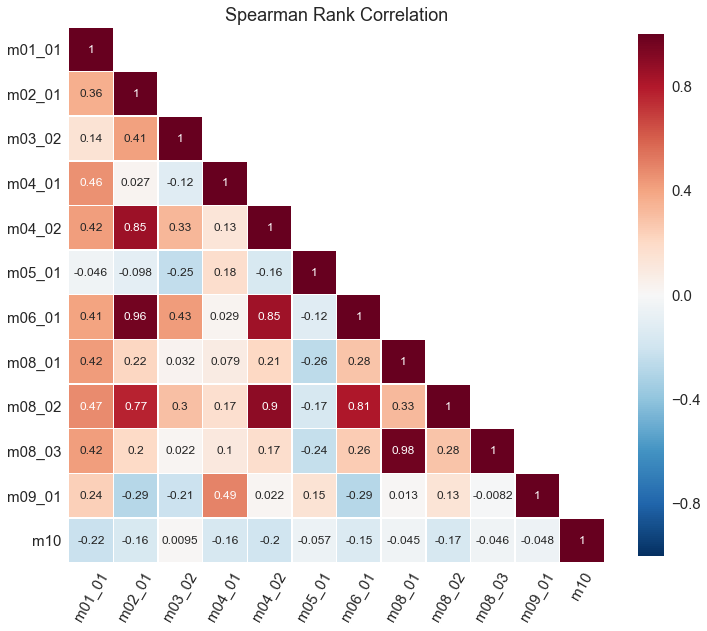

In [20]:
net_v.correlation_plot(spearmanr_df, title='Spearman Rank Correlation')